# Exploring Text

In this lesson, we'll be taking a look at a data set that contains SMS messages that are labelled as either a spam text message, or a valid, a.k text message.

In [1]:
import pandas as pd
df = pd.read_csv('spam.csv', 
                 encoding='latin-1',
                 usecols=[0,1]) # use first 2 columns only to get rid of unnamed columns full of nans
df.columns = ['label', 'text']
df.head()
# df.isnull().sum()

# df.info()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
labels = pd.concat([df.label.value_counts(), # get total counts of ham vs spam
                    df.label.value_counts(normalize=True)], axis=1) # getting the prop of ham vs. spam
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [3]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import acquire, prepare

def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [6]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [8]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [9]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords


In [10]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


Add a column with list of words

In [11]:
# (a|b)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [12]:
# df.words
# for i in range(len(df.text_filtered)):
#     re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[i]).split()
    
# def clean_more():
#     words = re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered
#     return

# df.text_filtered.apply(clean_more)

# [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc)]

In [13]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


**Exploring all the words together, Not by document**

- any common words that you're missing from the stopword list...noise that is still in your data. 
- common words that are spelled differently across the documents
- Are there words more common in spam than ham? vice versa?

**Exploring documents**

- exploring n-grams, phrases. bi-grams are 2-word phrases, tri-grams are 3-word phrases, 4-gram, ...

To finalize prep for exploration: 

1. add a feature that is the length of each document. 
2. build a set of ham_words and spam_words to epxlore. 

In [14]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

spam_words

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darlingweek word back id like fun still tb ok xxx std chgs send i12150 rcv winner valued network customer selected receivea i12900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership i12100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged i125month please confirm replying y

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [15]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    552
im      450
get     351
ur      343
dont    257
dtype: int64

Now we'll combine these three together to get one resulting data frame that we can work with:

In [16]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

In [17]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,552,210,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,251,246,5
ltgt,248,248,0
go,247,219,27
free,240,49,191
know,227,214,13


**Takeaways**

- what do you see? 



In [18]:
word_counts[word_counts.spam==0].sort_values(by='ham').tail(5)

,all,ham,spam
say,107,107,0
later,119,118,0
da,121,121,0
lor,129,129,0
ltgt,248,248,0


**Takeaways**

- what do you see? 

In [19]:
word_counts[word_counts.ham<5].sort_values(by='spam').tail(10)

,all,ham,spam
awarded,38,0,38
18,41,0,41
16,45,1,46
tc,51,2,49
guaranteed,50,0,50
urgent,60,2,59
tone,60,0,60
nokia,63,1,62
prize,82,0,82
claim,96,0,96


### Document Word Count

The length of documents is often a good feature. 

In [20]:
len(df.words[0])

12

In [21]:
df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [22]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


In [23]:
df = df[df.doc_length!=0]

## Visualize

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

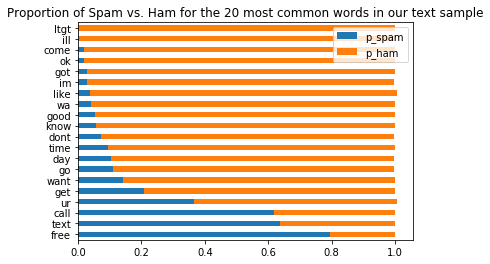

In [25]:
# visualize the percentage of the term in ham vs. spam

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'], 
                   p_ham = word_counts.ham/word_counts['all'])
 .sort_values(by='all')[['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True)
)

plt.title("Proportion of Spam vs. Ham for the 20 most common words in our text sample")

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

(-0.5, 399.5, 199.5, -0.5)

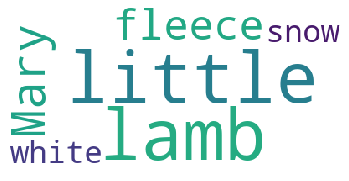

In [26]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)

plt.axis('off')

In [27]:
ham_words

'go jurong point crazy available bugisgreat world labuffet cine got amore wat ok lar joking wifonidun say early horc already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller presscopy friend callertune im gonna home soon dont want talk stuff anymore tonightive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching ehrememberspell name yesnaughty makewet fine thati12i12s wayfeel thati12i12s way gotaseriously spell name ii12i12i12m going trymonth ha ha joking i12 pay first lar da stock comin aft finish lunch go str lor ardsmth lorfinish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love im

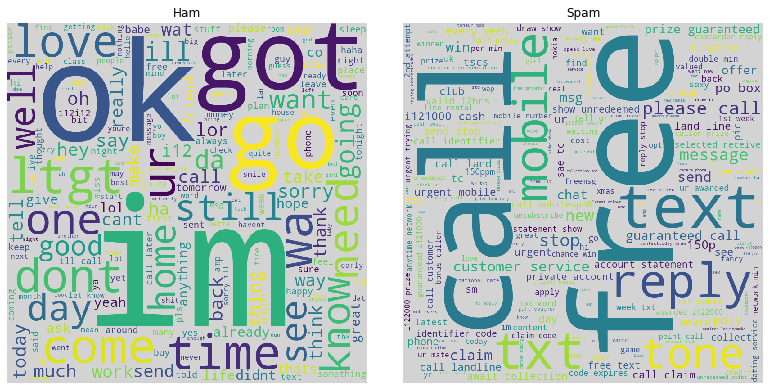

In [28]:
ham_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

# Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

In [29]:
sentence
bigrams = nltk.ngrams(sentence.split(), 2) # n = 2
list(bigrams)

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow.')]

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [30]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [31]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(prize, guaranteed)     22
(i121000, cash)         20
(every, week)           19
(send, stop)            19
(land, line)            18
(urgent, mobile)        18
(await, collection)     18
(valid, 12hrs)          17
(claim, call)           16
(account, statement)    16
(sae, tc)               16
(identifier, code)      15
(selected, receive)     15
(call, 08000930705)     15
(reply, call)           15
(call, mobileupd8)      15
dtype: int64

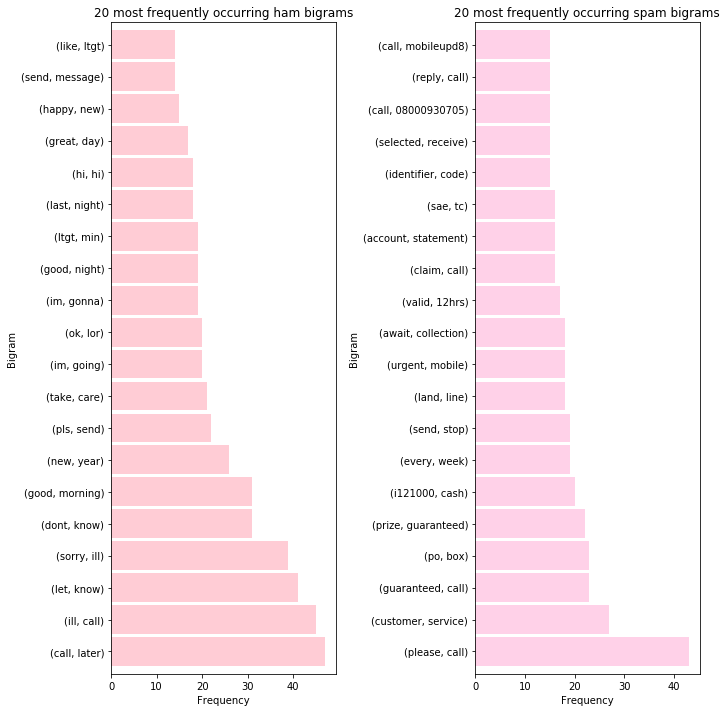

In [32]:
plt.subplot(121)
ham_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

We can use these bigrams to make a word cloud as well, with a little more effort.

In [33]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'please call': 43,
 'customer service': 27,
 'guaranteed call': 23,
 'po box': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'every week': 19,
 'send stop': 19,
 'land line': 18,
 'urgent mobile': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'claim call': 16,
 'account statement': 16,
 'sae tc': 16,
 'identifier code': 15,
 'selected receive': 15,
 'call 08000930705': 15,
 'reply call': 15,
 'call mobileupd8': 15}

(-0.5, 799.5, 399.5, -0.5)

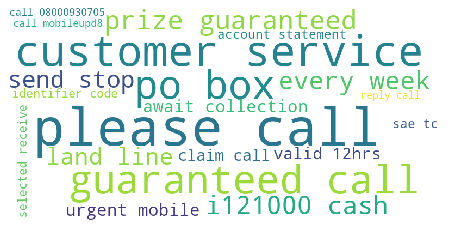

In [34]:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

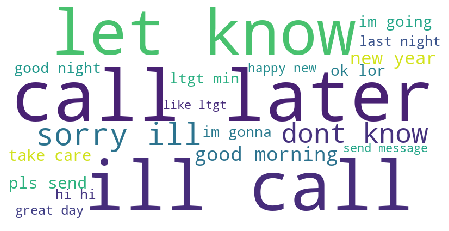

In [35]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
# data

img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

----------

----------

----------

# Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.
    1. bonus: plot document length information of spam vs. ham. Does there appear to be a difference? 

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.


### A,B,C, and D are answered above.

### E. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [36]:
sentence
trigrams = nltk.ngrams(sentence.split(), 3) # n = 2
list(trigrams)

[('Mary', 'had', 'a'),
 ('had', 'a', 'little'),
 ('a', 'little', 'lamb,'),
 ('little', 'lamb,', 'little'),
 ('lamb,', 'little', 'lamb,'),
 ('little', 'lamb,', 'little'),
 ('lamb,', 'little', 'lamb.'),
 ('little', 'lamb.', 'Its'),
 ('lamb.', 'Its', 'fleece'),
 ('Its', 'fleece', 'was'),
 ('fleece', 'was', 'white'),
 ('was', 'white', 'as'),
 ('white', 'as', 'snow.')]

In [37]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(camcorder, reply, call)               12
(guaranteed, i121000, cash)            12
(show, 800, unredeemed)                12
(anytime, network, min)                11
(bonus, caller, prize)                 11
(every, week, txt)                     11
(cash, await, collection)              10
(i122000, bonus, caller)               10
(customer, service, representative)    10
(please, call, customer)               10
(toneur, mob, every)                    9
(unredeemed, point, call)               9
(mob, every, week)                      9
(800, unredeemed, point)                9
dtype: int64

In [38]:
ham_trigrams

(ill, call, later)                 38
(sorry, ill, call)                 38
(happy, new, year)                 13
(pick, phone, right)               12
(pls, send, message)               12
(phone, right, pls)                12
(cant, pick, phone)                12
(right, pls, send)                 12
(hi, hi, hi)                       11
(good, morning, dear)               7
(convey, birthday, wish)            6
(kiss, across, sea)                 6
(pls, convey, birthday)             6
(love, go, day)                     5
(presscopy, friend, callertune)     5
(caller, presscopy, friend)         5
(didnt, wish, parent)               5
(bday, wife, didnt)                 5
(work, even, colleague)             5
(entered, cabin, pa)                5
dtype: int64

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [39]:
urls = acquire.get_all_urls()
blog_df = acquire.get_blog_articles(urls, cached = True)
blog_df

,title,content
0,What is Machine Learning?,"There’s a lot we can learn about machines, and..."
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu..."
2,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug..."
3,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...
4,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...
5,What is the Transition into Data Science Like?,Alumni Katy Salts and Brandi Reger joined us a...
6,What Data Science Career is For You?,If you’re struggling to see yourself as a data...
7,What to Expect at Codeup,"Setting Expectations for Life Before, During, ..."
8,What is Python?,If you’ve been digging around our website or r...
9,Your Education is an Investment,You have many options regarding educational ro...


In [40]:
blog_df['category']='Not Europe'
x.loc[x.Country.isin(europe),'New Column']='Europe'

NameError: name 'x' is not defined

In [41]:
blog_df['content_cleaned'] = blog_df.content.apply(prepare.basic_clean)

In [42]:
blog_df['content_tokenized'] = blog_df.content_cleaned.apply(tokenize)
blog_df['content_lemmatized'] = blog_df.content_tokenized.apply(lemmatize)
blog_df['content_filtered'] = blog_df.content_lemmatized.apply(remove_stopwords)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blog_df.content_filtered]
blog_df = pd.concat([blog_df, pd.DataFrame({'words': words})], axis=1)
blog_df.head()

,title,content,category,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words
0,What is Machine Learning?,"There’s a lot we can learn about machines, and...",Not Europe,theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...,"[lot, learn, machine, lot, machine, learnever,..."
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",Not Europe,here at codeup we believe its time to revoluti...,here at codeup we believe its time to revoluti...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,..."
2,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",Not Europe,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...,"[houston, problem, arent, enough, software, de..."
3,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,Not Europe,many codeup alumni enjoy competing in hackatho...,many codeup alumni enjoy competing in hackatho...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack..."
4,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,Not Europe,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m..."


In [70]:
all_words = ' '.join(blog_df.content_filtered)


all_words = re.sub(r'\s.\s', '', all_words)

all_words

'lot learn machine lot machine learnever wonder virtual personal assistant dating apps work netflix pick perfect show theyre learning optimizing building upon humancreated algorithm text type person swipe show pick stored data process called machine learning data plugged algorithm streamline next texting dating showpicking experience show might like let take entertainment streaming service store information title youve watched like genre actor year category rated order recommend title may also enjoy also considers title member similar preference enjoyed data stored used input algorithm set rule solve problem problem case might like new show watch continue interacting entertainment streaming service better recommendation data ha choose watch machine really learning yes well learning human tell learn way might read book givenstudy memorize course material computer gather store data tell store however choose go beyond book learn source running internet search asking others machine lack in

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [44]:
all_freq = pd.Series(all_words.split()).value_counts()
all_freq.head()

data        137
codeup      106
wa           67
learning     51
job          51
dtype: int64

### Document word count

In [45]:
len(blog_df.words[0])

blog_df['doc_length'] = [len(wordlist) for wordlist in blog_df.words]
blog_df.head()

,title,content,category,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words,doc_length
0,What is Machine Learning?,"There’s a lot we can learn about machines, and...",Not Europe,theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...,"[lot, learn, machine, lot, machine, learnever,...",246
1,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",Not Europe,here at codeup we believe its time to revoluti...,here at codeup we believe its time to revoluti...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,...",173
2,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",Not Europe,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...,"[houston, problem, arent, enough, software, de...",199
3,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,Not Europe,many codeup alumni enjoy competing in hackatho...,many codeup alumni enjoy competing in hackatho...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack...",295
4,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,Not Europe,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m...",193


In [72]:
word_counts = word_counts.sort_values(by='all', ascending=False).head(10)
word_counts

,business,sports,technology,entertainment,all
said,16,17,14,19,66
ha,17,15,20,10,62
wa,8,10,10,14,42
india,10,14,3,2,29
added,4,5,4,14,27
film,0,0,0,19,19
australia,0,18,0,0,18
actor,0,0,0,18,18
monday,10,3,4,1,18
year,9,1,3,2,15


# Visualize

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

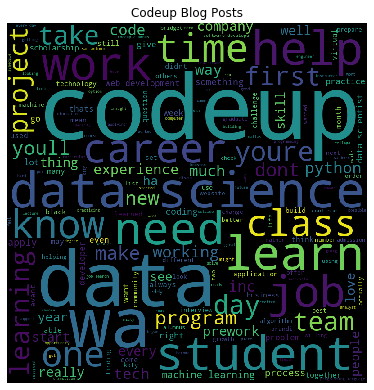

In [50]:
word_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(all_words)
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5])]
axs[0].imshow(word_cloud)
axs[0].set_title('Codeup Blog Posts')
for ax in axs: ax.axis('off')


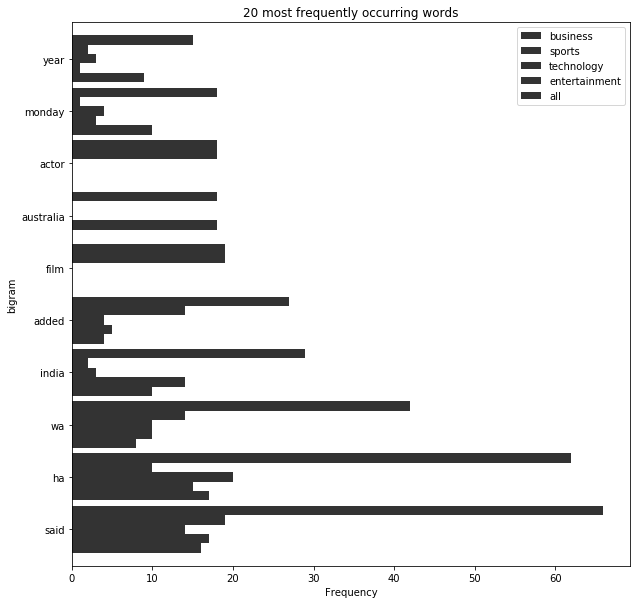

In [73]:
word_counts.plot.barh(color='black', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring words')
plt.ylabel('bigram')
plt.xlabel('Frequency')
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [53]:
df = acquire.get_news_articles(cached=True)
df.head()

,topic,title,author,content
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...


In [54]:
df['title_cleaned'] = df.title.apply(prepare.basic_clean)
df.head()


,topic,title,author,content,title_cleaned
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,lakshmi vilas bank withdrawals capped at 25000...
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,shutting delhi markets may prove counterproduc...
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer shares drop 45 as moderna says its vacc...
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,musk gets 15bn richer in 2 hours becomes world...
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...,what have i done to deserve this tharoor respo...


In [55]:
df['content_cleaned'] = df.content.apply(basic_clean)
df.head()


,topic,title,author,content,title_cleaned,content_cleaned
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,lakshmi vilas bank withdrawals capped at 25000...,the centre has imposed a 30day moratorium on l...
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,shutting delhi markets may prove counterproduc...,traders body cait on tuesday said a proposal t...
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer shares drop 45 as moderna says its vacc...,pfizers shares fell as much as 45 on monday af...
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,musk gets 15bn richer in 2 hours becomes world...,billionaire elon musk added 15 billion to his ...
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...,what have i done to deserve this tharoor respo...,responding to a joke on him by rpg groups bill...


In [56]:
df['title_tokenized'] = df.title_cleaned.apply(tokenize)
df['title_lemmatized'] = df.title_tokenized.apply(lemmatize)
df['title_filtered'] = df.title_lemmatized.apply(remove_stopwords)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.title_filtered]
df_title = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df_title.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,words
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,lakshmi vilas bank withdrawals capped at 25000...,the centre has imposed a 30day moratorium on l...,lakshmi vilas bank withdrawals capped at 25000...,lakshmi vila bank withdrawal capped at 25000 t...,lakshmi vila bank withdrawal capped 25000 till...,"[lakshmi, vila, bank, withdrawal, capped, 2500..."
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,shutting delhi markets may prove counterproduc...,traders body cait on tuesday said a proposal t...,shutting delhi markets may prove counterproduc...,shutting delhi market may prove counterproduct...,shutting delhi market may prove counterproduct...,"[shutting, delhi, market, may, prove, counterp..."
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer shares drop 45 as moderna says its vacc...,pfizers shares fell as much as 45 on monday af...,pfizer shares drop 45 as moderna says its vacc...,pfizer share drop 45 a moderna say it vaccine ...,pfizer share drop 45 moderna say vaccine store...,"[pfizer, share, drop, 45, moderna, say, vaccin..."
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,musk gets 15bn richer in 2 hours becomes world...,billionaire elon musk added 15 billion to his ...,musk gets 15bn richer in 2 hours becomes world...,musk get 15bn richer in 2 hour becomes world 3...,musk get 15bn richer 2 hour becomes world 3rd ...,"[musk, get, 15bn, richerhour, becomes, world, ..."
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...,what have i done to deserve this tharoor respo...,responding to a joke on him by rpg groups bill...,what have i done to deserve this tharoor respo...,what have i done to deserve this tharoor respo...,done deserve tharoor responds goenkas joke,"[done, deserve, tharoor, responds, goenkas, joke]"


In [57]:
df['content_tokenized'] = df.content_cleaned.apply(tokenize)
df['content_lemmatized'] = df.content_tokenized.apply(lemmatize)
df['content_filtered'] = df.content_lemmatized.apply(remove_stopwords)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.content_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,lakshmi vilas bank withdrawals capped at 25000...,the centre has imposed a 30day moratorium on l...,lakshmi vilas bank withdrawals capped at 25000...,lakshmi vila bank withdrawal capped at 25000 t...,lakshmi vila bank withdrawal capped 25000 till...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...,"[centre, ha, imposed, 30day, moratorium, laksh..."
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,shutting delhi markets may prove counterproduc...,traders body cait on tuesday said a proposal t...,shutting delhi markets may prove counterproduc...,shutting delhi market may prove counterproduct...,shutting delhi market may prove counterproduct...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ..."
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer shares drop 45 as moderna says its vacc...,pfizers shares fell as much as 45 on monday af...,pfizer shares drop 45 as moderna says its vacc...,pfizer share drop 45 a moderna say it vaccine ...,pfizer share drop 45 moderna say vaccine store...,pfizers shares fell as much as 45 on monday af...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,"[pfizers, share, fell, much, 45, monday, rival..."
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,musk gets 15bn richer in 2 hours becomes world...,billionaire elon musk added 15 billion to his ...,musk gets 15bn richer in 2 hours becomes world...,musk get 15bn richer in 2 hour becomes world 3...,musk get 15bn richer 2 hour becomes world 3rd ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ..."
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...,what have i done to deserve this tharoor respo...,responding to a joke on him by rpg groups bill...,what have i done to deserve this tharoor respo...,what have i done to deserve this tharoor respo...,done deserve tharoor responds goenkas joke,responding to a joke on him by rpg groups bill...,responding to a joke on him by rpg group billi...,responding joke rpg group billionaire chairman...,"[responding, joke, rpg, group, billionaire, ch..."


In [58]:
business_words = ' '.join(df[df.topic=='business'].content_filtered)
sports_words = ' '.join(df[df.topic=='sports'].content_filtered)
tech_words = ' '.join(df[df.topic=='technology'].content_filtered)
ent_words = ' '.join(df[df.topic=='entertainment'].content_filtered)
all_words = ' '.join(df.content_filtered)

business_words = re.sub(r'\s.\s', '', business_words)
sports_words = re.sub(r'\s.\s', '', sports_words)
tech_words = re.sub(r'\s.\s', '', tech_words)
ent_words = re.sub(r'\s.\s', '', ent_words)
all_words = re.sub(r'\s.\s', '', all_words)

sports_words

'former india cricketer aakash chopra said csk shouldnt retain dhoni mega auction happens ahead next ipl due high price release dhoni mega auction pick right match card pick right player desired money kitty aakash added team india captain virat kohli took twitter share picture hotel room quarantining australia ahead odi series quarantine diary unironed tshirt comfortable couch good series watch captioned picture australiaindia odi series begin november 27 bcci tuesday announced mpl sport new kit sponsor official merchandise partner indian cricket team till december 2023 senior men woman under19 team part deal mpl sport association bcci begin upcoming india tour australia see team india sporting new jersey bcci said pacer sudeep tyagi represented india four odis t20i 200910 ha retired form cricket aged 33 sharing farewell note sudeep wrote cricket existence soul difficult move ahead must let go ghaziabadborn pacer took 109 wicket 41 firstclass match former australia fast bowler glenn mc

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [59]:
business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
tech_freq = pd.Series(tech_words.split()).value_counts()
ent_freq = pd.Series(ent_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

sports_freq.head()

australia    18
said         17
ha           15
india        14
test         11
dtype: int64

### Now we'll combine these 5 together to get one resulting data frame that we can work with:

In [60]:
word_counts = (pd.concat([business_freq, sports_freq, tech_freq, ent_freq, all_freq], axis=1, sort=True)
               .set_axis(['business', 'sports', 'technology','entertainment','all'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,business,sports,technology,entertainment,all
10,3,0,0,0,3
100,1,2,1,0,4
100000,0,0,1,0,1
103,1,0,0,0,1
109,0,1,0,0,1


### We can now use this data set to answer some interesting questions:
- Are there words that should be added to the stopword list?
- Are there words that are significantly more likely to occur in multiple topics?

In [61]:
# which words show up more

word_counts.sort_values(by='all', ascending=False).head(10)

,business,sports,technology,entertainment,all
said,16,17,14,19,66
ha,17,15,20,10,62
wa,8,10,10,14,42
india,10,14,3,2,29
added,4,5,4,14,27
film,0,0,0,19,19
australia,0,18,0,0,18
actor,0,0,0,18,18
monday,10,3,4,1,18
year,9,1,3,2,15


In [62]:
# words that I would assume are sports related
word_counts[word_counts.business==0].sort_values(by='sports').tail(10)

,business,sports,technology,entertainment,all
buttler,0,5,0,0,5
cricket,0,6,0,0,6
pacer,0,6,0,0,6
kohli,0,6,0,0,6
captain,0,7,0,0,7
team,0,7,0,0,7
virat,0,8,0,0,8
series,0,9,0,2,11
test,0,11,3,0,14
australia,0,18,0,0,18


In [63]:
word_counts[word_counts.entertainment==0].sort_values(by='business').tail(10)

,business,sports,technology,entertainment,all
company,4,2,8,0,14
three,5,1,1,0,7
economic,5,0,2,0,7
government,5,1,4,0,10
stock,5,0,2,0,7
billion,6,0,6,0,12
tuesday,7,4,2,0,13
vaccine,7,0,1,0,8
stake,8,0,0,0,8
bank,9,0,1,0,10


### Document word count

In [64]:
len(df.words[0])

df['doc_length'] = [len(wordlist) for wordlist in df.words]
df.head()

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words,doc_length
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,lakshmi vilas bank withdrawals capped at 25000...,the centre has imposed a 30day moratorium on l...,lakshmi vilas bank withdrawals capped at 25000...,lakshmi vila bank withdrawal capped at 25000 t...,lakshmi vila bank withdrawal capped 25000 till...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...,"[centre, ha, imposed, 30day, moratorium, laksh...",34
1,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,shutting delhi markets may prove counterproduc...,traders body cait on tuesday said a proposal t...,shutting delhi markets may prove counterproduc...,shutting delhi market may prove counterproduct...,shutting delhi market may prove counterproduct...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ...",43
2,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer shares drop 45 as moderna says its vacc...,pfizers shares fell as much as 45 on monday af...,pfizer shares drop 45 as moderna says its vacc...,pfizer share drop 45 a moderna say it vaccine ...,pfizer share drop 45 moderna say vaccine store...,pfizers shares fell as much as 45 on monday af...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,"[pfizers, share, fell, much, 45, monday, rival...",34
3,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,musk gets 15bn richer in 2 hours becomes world...,billionaire elon musk added 15 billion to his ...,musk gets 15bn richer in 2 hours becomes world...,musk get 15bn richer in 2 hour becomes world 3...,musk get 15bn richer 2 hour becomes world 3rd ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ...",42
4,business,What have I done to deserve this: Tharoor resp...,Krishna Veera Vanamali,Responding to a joke on him by RPG Group's bil...,what have i done to deserve this tharoor respo...,responding to a joke on him by rpg groups bill...,what have i done to deserve this tharoor respo...,what have i done to deserve this tharoor respo...,done deserve tharoor responds goenkas joke,responding to a joke on him by rpg groups bill...,responding to a joke on him by rpg group billi...,responding joke rpg group billionaire chairman...,"[responding, joke, rpg, group, billionaire, ch...",28


In [65]:
# looking for zero word count
df[df.doc_length == 0]

,topic,title,author,content,title_cleaned,content_cleaned,title_tokenized,title_lemmatized,title_filtered,content_tokenized,content_lemmatized,content_filtered,words,doc_length


# Visualize

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 936x504 with 0 Axes>

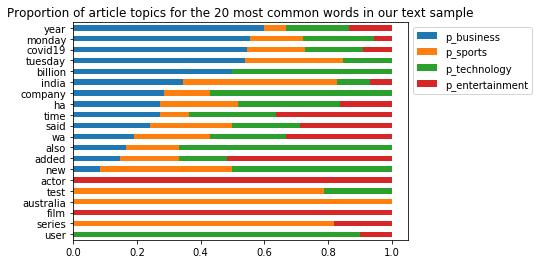

In [67]:
# visualize the percentage of the term in ham vs. spam
plt.figure(figsize = (13,7))
(word_counts.assign(p_business = word_counts.business/word_counts['all'], 
                   p_sports = word_counts.sports/word_counts['all'],
                   p_technology = word_counts.technology/word_counts['all'],
                   p_entertainment = word_counts.entertainment/word_counts['all'],)
 .sort_values(by='all')[['p_business', 'p_sports','p_technology','p_entertainment']]
 .tail(20)
 .sort_values('p_business')
 .plot.barh(stacked=True)
)

plt.title("Proportion of article topics for the 20 most common words in our text sample")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

# Word Clouds

IndexError: list index out of range

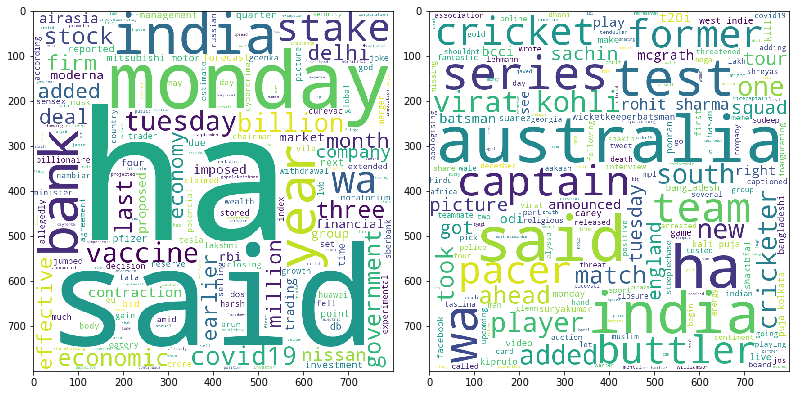

In [68]:
business_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(business_words)

sports_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(sports_words)

tech_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(tech_words)

ent_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(ent_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(business_cloud)
axs[1].imshow(sports_cloud)
axs[2].imshow(tech_cloud)
axs[3].imshow(ent_cloud)

axs[0].set_title('Business')
axs[1].set_title('Sports')
axs[2].set_title('Technology')
axs[3].set_title('Entertainment')

for ax in axs: ax.axis()

# Bigrams
- Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.
- To produce the bigrams, we'll use nltk.

In [ ]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

In [ ]:
business_bigrams = pd.Series(list(nltk.ngrams(business_words.split(), 2))).value_counts().head(20)
sports_bigrams = pd.Series(list(nltk.ngrams(sports_words.split(), 2))).value_counts().head(20)
tech_bigrams = pd.Series(list(nltk.ngrams(tech_words.split(), 2))).value_counts().head(20)
ent_bigrams = pd.Series(list(nltk.ngrams(ent_words.split(), 2))).value_counts().head(20)
business_bigrams

In [ ]:
#plt.subplot(121)
business_bigrams.plot.barh(color='teal', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring Business bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

In [ ]:
#plt.subplot(122)
sports_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#plt.subplot(131)
tech_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring Tech bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#plt.subplot(132)
ent_bigrams.plot.barh(color='teal', width=.9, figsize=(10, 10), alpha=1)
plt.title('20 most frequently occurring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
#plt.tight_layout()
plt.show()

### We can use these bigrams to make a word cloud as well, with a little more effort.

In [ ]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
data

In [ ]:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [ ]:
data1 = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img1 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data1)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.axis('off')

In [ ]:
data2 = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
img2 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data2)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.axis('off')

In [ ]:
data3 = {k[0] + ' ' + k[1]: v for k, v in ent_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data3)
plt.figure(figsize=(8, 4))
plt.imshow(img3)
plt.axis('off')

## Feature Extraction

1. Word count: how many words appear in each document
2. Term Frequency (TF): How often a word appears in a document.
3. Inverse Document Frequency (IDF): How much information a word provides, based on how commonly a word appears across multiple documents. The more frequently a word appears, the lower the IDF for that word will be. $$
\mbox{idf}(\mbox{word})
=
\log\left(\frac{\mbox{# of documents}}{\mbox{# of documents containing the word}}\right)
$$

4. Term Frequency - Inverse Document Frequency (TF-IDF): The multiplication of the two measures above. A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. 

### Term Frequency

Term frequency describes how frequently a word appears **in a document**. It can be calculated in a number of ways:

- **Raw Count**: The count of the number of occurences of each word **in the document**.

- **Frequency**: The number of times each word appears divided by the total number of words **in the document**.
    
- **Augmented Frequency**: The frequency of each word divided by the maximum frequency **in the document**. This can help prevent bias towards larger documents.